<h1 align="center">Linear Regression Algorithm from Scratch:</h1><br>

**Linear Regression is a statistical model used to predict the relationship between independent variable and dependent variable.**


Ajay Vardhan Reddy

Cssoc-ML

### 1) Import the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Load data:

In [2]:
df = pd.read_csv('house_price.csv')
df.head()

,total_sqft,price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00


### 3) Checking Summary of Data 

In [3]:
df.shape

(13320, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13320 non-null  object 
 1   price       13320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 208.2+ KB


In [5]:
df.describe()

,price
count,13320.000000
mean,112.565627
std,148.971674
min,8.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,3600.000000


### 4) Data Munging/Data Cleaning:

Machine Learning Algorithms can handle only numerical data. But, feature column("total_sqft") is object data. So we need to convert to Numerical data. But feature column("total_sqft") has few non-numerical data. So, lets find that non-numeric data and convert to numerical data.

In [6]:
# This function checks whether each value in feature column("total_sqft") is numerical or not.
def is_numerical(x):
    try:
        float(x)
    except:
        return False
    return True

In [7]:
df[~df['total_sqft'].apply(is_numerical)].count()

total_sqft    247
price         247
dtype: int64

**There are 247 non-numeric values in feature column("total_sqft"). Hence we need to convert them into numeric.**

**The below function converts each non-numeric value to numeric.**

In [8]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [9]:
df1 = df.copy() 
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)

In [10]:
house_prices = df1

In [11]:
house_prices.shape

(13320, 2)

In [12]:
house_prices.dtypes

total_sqft    float64
price         float64
dtype: object

### 5) Handling NaN values:

In [13]:
house_prices.isna().sum()

total_sqft    46
price          0
dtype: int64

#### Percentage of Nan values:

In [14]:
(house_prices.isna().sum()/house_prices.shape[0])*100

total_sqft    0.345345
price         0.000000
dtype: float64

#### Percentage of Nan values is 0.34%, which is less than 5%. In that case we can happily drop Nan values.

In [15]:
house_prices.dropna(how='any',inplace=True)

### 6) Handling outliers:

Text(0, 0.5, 'price')

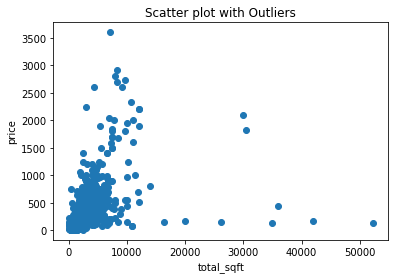

In [16]:
plt.scatter(house_prices['total_sqft'],house_prices['price'])
plt.title('Scatter plot with Outliers')
plt.xlabel('total_sqft')
plt.ylabel('price')

In [17]:
house_prices = house_prices[house_prices['total_sqft']<10000]

Text(0, 0.5, 'price')

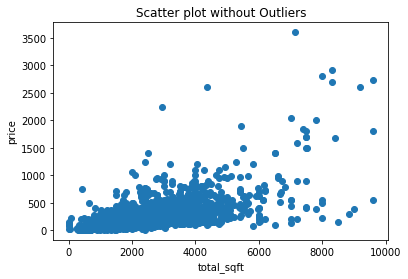

In [18]:
plt.scatter(house_prices['total_sqft'],house_prices['price'])
plt.title('Scatter plot without Outliers')
plt.xlabel('total_sqft')
plt.ylabel('price')

### 7) Split data into training and testing data.

In [19]:
#shuffling data to reduce bias and variance
house_prices = house_prices.sample(frac=1)

In [20]:
#training and testing size
train_size=int(0.7*house_prices.shape[0])
test_size=int(0.3*house_prices.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 9272
Testing set size : 3974


In [21]:
X = house_prices.iloc[:,0]
Y = house_prices.iloc[:,1]

In [22]:
#train_test_split
x_train = X[0:train_size]
y_train = Y[0:train_size]
x_test = X[train_size:]
y_test = Y[train_size:]

In [23]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

<h2 align="center">Linear Regression Algorithm from scratch:</h2>

In [24]:
# Author: Ajay Vardhan Reddy

class simpleLinearRegression():
    
    '''
    Simple Linear Regression Algorithm from Scratch using Least Mean Square(LSR).
    '''
    
    def __init__(self):
        
        '''
        Initializing the model parameters Slope and bias
        '''
        
        self.slope = 0
        self.bias = 0
        
    def fit(self,X,Y):
        
        '''
        This function is used to find parameters of a model, slope and bias, which helps to create a best fit line. Hence, train
        the model.
        '''
        
        x_mean = np.mean(X)
        y_mean = np.mean(Y)
        size_of_data_set = len(X)
        numerator = 0
        denominator = 0
        for i in range(size_of_data_set):
            numerator += (X[i] - x_mean)*(Y[i] - y_mean)
            denominator += pow((X[i] - x_mean),2)
        print(numerator,denominator)
        self.slope = numerator/denominator
        self.bias = y_mean - (self.slope*x_mean)
        
    
    def predict(self,val):
        
        '''
        This function predicts the dependent varaible(y) using Independent variable(X)
        '''
        
        prediction = (self.slope*val)+self.bias
        return prediction
    
    def cost(self,y,y_pred):
        
        '''
        This function finds the cost of the model
        '''
        
        cost = (1/len(y))*sum([val**2 for val in (y-y_pred)])
        return cost
    
    def root_mean_square_error(self,y,y_pred):
        
        '''
        This function finds the Root mean square Error value of the model
        '''
        
        rmse = np.sqrt((1/len(y))*sum([val**2 for val in (y-y_pred)]))
        return rmse

### 8) Initializing and training a model:

In [25]:
model = simpleLinearRegression()
model.fit(x_train,y_train)

729791541.854375 6589418498.699378


### 9) Predicting the target variable:

In [26]:
y_pred = model.predict(x_test)
y_pred

array([ 40.43232031,  86.94817716, 122.83183815, ..., 106.88354438,
       137.78336357,  53.72256512])

#### Slope(coefficient) and bias(intercept) of a best fit line

In [27]:
print("slope: {}".format(model.slope))
print("Bias: {}".format(model.bias))

slope: 0.11075204010770018
Bias: -59.24451578627213


### 10) Visualizing the best fit line:

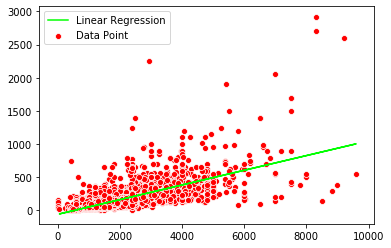

In [28]:
plt.plot(x_test, y_pred, color='#00ff00', label='Linear Regression') #fitline
sns.scatterplot(x_train,y_train, color='#ff0000', label='Data Point') #plot datapoints

### 11) Finding the performance(metrics) of Model

In [29]:
#using cost function
model.cost(y_test,y_pred)

12385.424430409212

In [30]:
#using Root Mean Square Error
model.root_mean_square_error(y_test,y_pred)

111.28982177364294

<br>
<h2 align="center">Linear Regression Algorithm Calculation part on paper:</h2>

<img src="linear_regression_calculation_1.jpg" width="50%">

<img src="linear_regression_calculation_2.jpg" width="50%">